<a href="https://colab.research.google.com/github/wissemkarous/Tensorflow-from-scratch/blob/main/learn_pytorch_vs_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
#import data :
transforms=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset=torchvision.datasets.FashionMNIST(root='data',train=True,download=True,transform=transforms)
test_dataset=torchvision.datasets.FashionMNIST(root='data',train=False,download=True,transform=transforms)
# import data using tf
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()



100%|██████████| 26421880/26421880 [00:00<00:00, 68011577.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 2054073.18it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 21605184.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23832535.31it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

4422102/4422102 [==============================] - 1s 0us/step


tensor(9)


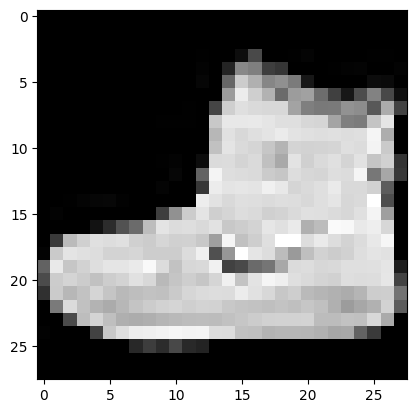

In [22]:
#PyTorch - Loading the Data
def imshowPytorch(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=32,
                                           shuffle=False)

data_iter = iter(train_loader)
images, label = next(data_iter)
imshowPytorch(torchvision.utils.make_grid(images[0]))
print(label[0])

In [8]:
# building the model
modeltf = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation='relu'),
    tf.keras.layers.Dense(84,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


In [28]:
class modelpytorch(nn.Module):
    def __init__(self, num_of_class):
        super(modelpytorch, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2))
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
        )
        self.classifier = nn.Linear(84, 10)

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(-1, 16*5*5)
        x = self.fc_model(x)
        x = self.classifier(x)
        return x

In [29]:

#PyTorch - Visualizing the Model
modelpy = modelpytorch(10)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(modelpy.parameters())
modelpy

modelpytorch(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
  )
  (classifier): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
#TensorFlow - Visualizing the Model
modeltf.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
modeltf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d (Average  (None, 5, 5, 64)          0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 120)               1

In [31]:

#PyTorch - Training the Model
for e in range(30):
    # define the loss value after the epoch
    losss = 0.0
    number_of_sub_epoch = 0

    # loop for every training batch (one epoch)
    for images, labels in train_loader:
        #create the output from the network
        out = modelpy(images)
        # count the loss function
        loss = criterion(out, labels)
        # in pytorch you have assign the zero for gradien in any sub epoch
        optim.zero_grad()
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        # add new value to the main loss
        losss += loss.item()
        number_of_sub_epoch += 1
    print("Epoch {}: Loss: {}".format(e, losss / number_of_sub_epoch))


Epoch 0: Loss: 0.6326059960444769
Epoch 1: Loss: 0.42425710620482765
Epoch 2: Loss: 0.357038085013628
Epoch 3: Loss: 0.3171919202884038
Epoch 4: Loss: 0.2894999872525533
Epoch 5: Loss: 0.26774146287242573
Epoch 6: Loss: 0.25056555242737133
Epoch 7: Loss: 0.23602735007405282
Epoch 8: Loss: 0.222892385567228
Epoch 9: Loss: 0.2107965895573298
Epoch 10: Loss: 0.20075411873062451
Epoch 11: Loss: 0.1920593598783016
Epoch 12: Loss: 0.1831951757858197
Epoch 13: Loss: 0.17419061341981093
Epoch 14: Loss: 0.16690063188423712
Epoch 15: Loss: 0.15916002621551353
Epoch 16: Loss: 0.1524017849067847
Epoch 17: Loss: 0.1461206109777093
Epoch 18: Loss: 0.13892268881052733
Epoch 19: Loss: 0.13626908117632072
Epoch 20: Loss: 0.12947710828098158
Epoch 21: Loss: 0.12368368907819191
Epoch 22: Loss: 0.12059906367361546
Epoch 23: Loss: 0.11574189556154112
Epoch 24: Loss: 0.11025754293265443
Epoch 25: Loss: 0.10710206641269227
Epoch 26: Loss: 0.10644214228553077
Epoch 27: Loss: 0.10353749660998583
Epoch 28: Loss

In [33]:
#TensorFlow - Training the Model
train_images_tensorflow = (train_images / 255.0).reshape(train_images.shape[0], 28, 28, 1)
test_images_tensorflow = (test_images / 255.0).reshape(test_images.shape[0], 28, 28 ,1)
train_labels_tensorflow=tf.keras.utils.to_categorical(train_labels)
test_labels_tensorflow=tf.keras.utils.to_categorical(test_labels)
modeltf.fit(train_images_tensorflow, train_labels_tensorflow, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 14s 5ms/step - loss: 0.4912 - accuracy: 0.8178
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3182 - accuracy: 0.8824
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2719 - accuracy: 0.9008
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2382 - accuracy: 0.9117
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2175 - accuracy: 0.9194
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1955 - accuracy: 0.9268
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1812 - accuracy: 0.9317
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1638 - accuracy: 0.9384
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1505 - accuracy: 0.9434
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.13

In [34]:

#PyTorch - Comparing the Results
correct = 0
total = 0
modelpy.eval()
for images, labels in test_loader:
    outputs = modelpy(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the {} test images: {}% with PyTorch'.format(total, 100 * correct // total))

Test Accuracy of the model on the 10000 test images: 89% with PyTorch


In [36]:
#TensorFlow - Comparing the Results
predictions = modeltf.predict(test_images_tensorflow)
correct = 0
for i, pred in enumerate(predictions):
  if np.argmax(pred) == test_labels[i]:
    correct += 1
print('Test Accuracy of the model on the {} test images: {}% with TensorFlow'.format(test_images.shape[0],
                                                                     100 * correct/test_images.shape[0]))

313/313 [==============================] - 1s 2ms/step
Test Accuracy of the model on the 10000 test images: 90.94% with TensorFlow
